# Analysing my Typing speed progression 
I obtained the data of my touch typing learning over the course of a month.  


## Imports and loading the dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import altair as alt

In [2]:
d = pd.read_json('typing-data.json')

In [3]:
df = d[27:]
df = df[['timeStamp','length', 'time', 'errors',
       'speed', 'histogram']]
df.reset_index(drop = True, inplace = True)

### Looking at the data

This is what the dataframe looks like

In [4]:
df.head()

timeStamp  length   time  errors  speed  \
0 2020-07-02 20:08:47+00:00     121  39288       8    185   
1 2020-07-02 20:09:28+00:00     123  35937       4    205   
2 2020-07-02 20:10:05+00:00     124  39959       7    186   
3 2020-07-02 20:10:46+00:00     126  37615       4    201   
4 2020-07-02 20:11:25+00:00     121  37476       8    194   

                                           histogram  
0  [{'charCode': 32, 'hitCount': 20, 'missCount':...  
1  [{'charCode': 32, 'hitCount': 21, 'missCount':...  
2  [{'charCode': 32, 'hitCount': 21, 'missCount':...  
3  [{'charCode': 32, 'hitCount': 23, 'missCount':...  
4  [{'charCode': 32, 'hitCount': 20, 'missCount':...

In [5]:
df.describe()

length          time       errors        speed
count  1417.000000   1417.000000  1417.000000  1417.000000
mean    122.660550  31392.935780     8.931546   245.219478
std       3.456522   7058.952734     3.039565    50.050869
min     112.000000  20059.000000     1.000000   106.000000
25%     121.000000  26263.000000     7.000000   204.000000
50%     123.000000  29414.000000     9.000000   251.000000
75%     125.000000  35667.000000    11.000000   284.000000
max     135.000000  68173.000000    22.000000   368.000000

This is the data stored in "histogram" of the last row

In [6]:
pd.DataFrame(df['histogram'].iloc[-1]).head() #json_normalize

charCode  hitCount  missCount  timeToType
0        32        21          1         146
1        97        14          1         152
2        99         5          0         327
3       100         4          1         119
4       101        15          0         152

### Create DataFrame for character level data
dfi : dataframe containing all character level typing data  
We append "histogram" value of all the rows, adding each row's sample no as a new column

In [7]:
dfi = pd.DataFrame()

for i in range(len(df['histogram'].values)):
#     print(i)
    x = pd.DataFrame(df['histogram'].values[i])
    x['sample no'] = i
    dfi = dfi.append(x) #'timeStamp'
display(dfi.head())
display(dfi.shape)

charCode  hitCount  missCount  timeToType  sample no
0        32        20          0         161          0
1       101        27          2         241          0
2       105        17          1         309          0
3       108         3          0         408          0
4       110        11          2         384          0

(27958, 5)

Vocabulary over time:

In [8]:
total_vocab = dfi.groupby('sample no')[['sample no']].agg('count') #'charCode','hitCount','missCount','timeToType',
display(total_vocab.head())
display(total_vocab.shape)

sample no
sample no           
0                  7
1                  7
2                  7
3                  7
4                  7

(1417, 1)

***

# Visualizing the Data trends with time

<BarContainer object of 1417 artists>

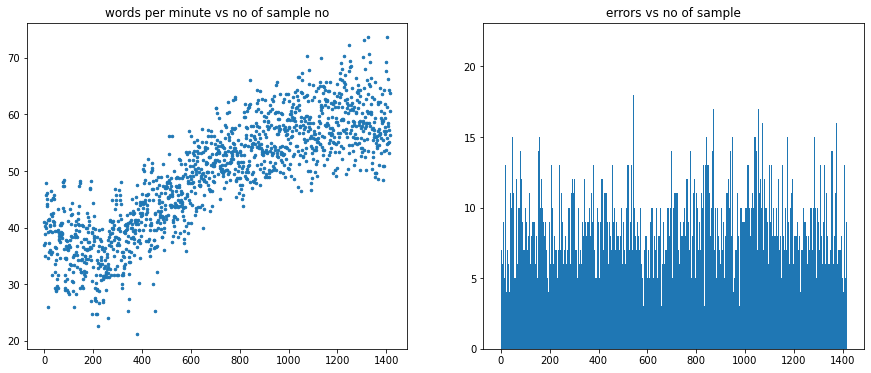

In [9]:
plt.figure(figsize = (15,6))

plt.subplot(121)
plt.title("words per minute vs no of sample no")
plt.plot(df[['speed']]/5, 'o', markersize = '2.5')

plt.subplot(122)
plt.title("errors vs no of sample")
plt.bar(df['errors'].index, df['errors'], width = 1)# , 'o',markersize = '1.5',

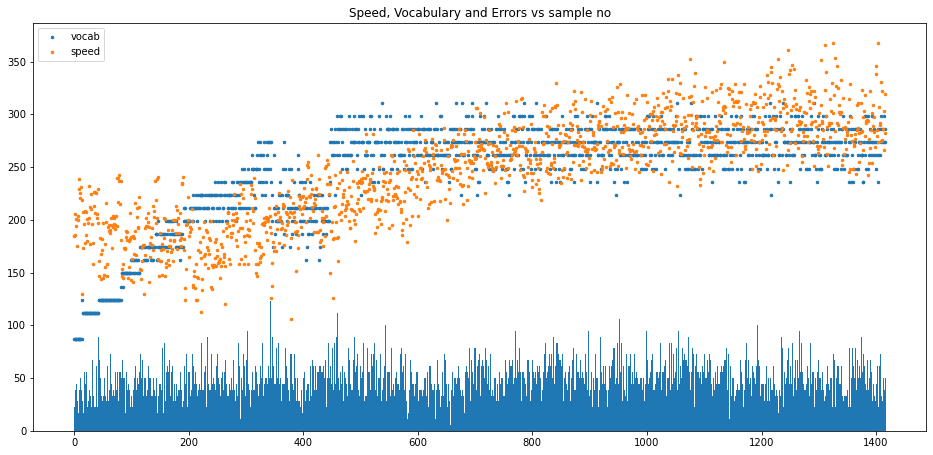

In [10]:
plt.figure(figsize = (16,7.5))
plt.title("Speed, Vocabulary and Errors vs sample no")
plt.plot(total_vocab*np.mean(df[['speed']].values)/np.mean(total_vocab), 'o', markersize = '2.5') #linewidth = '0.5'
plt.plot(df[['speed']], 'o', markersize = '2.5')
plt.bar(df['errors'].index, df['errors']*np.mean(df[['speed']].values)/df['errors'].max()/2, width = 1)# , 'o',markersize = '1.5',
plt.legend(["vocab","speed"])

***

# How is speed related to errors?

### Analysing Speed vs Speed/Errors

speed/error scaled: 
 count    1417.000000
mean      245.219478
std       153.422506
min        43.428039
25%       159.236143
50%       212.314857
75%       283.402421
max      2130.731248
dtype: float64


speed: 
 count    1417.000000
mean      245.219478
std        50.050869
min       106.000000
25%       204.000000
50%       251.000000
75%       284.000000
max       368.000000
Name: speed, dtype: float64


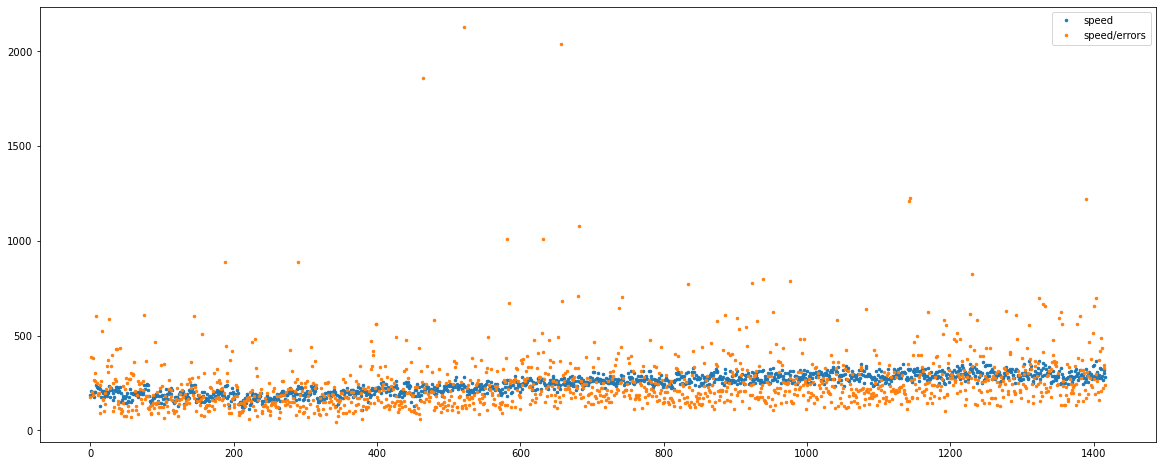

In [11]:
plt.figure(figsize = (20,8))

df_s_e = (df['speed']/df['errors'])*df['speed'].mean()/(df['speed']/df['errors']).mean()
                                                      
print("speed/error scaled:",'\n',df_s_e.describe())
print('\n')
print("speed:",'\n',df['speed'].describe() )
                                                      
plt.plot(df[['speed']], 'o', markersize = '2.5')
plt.plot(df_s_e, 'o', markersize = '2.5')
plt.legend(['speed','speed/errors'])


We observe that after adjusting the mean, standard deviation of "speed/errors" is 3 times that of "speed"  

This means that when I made less errors, I typed faster and vice versa

### Correlation matrix

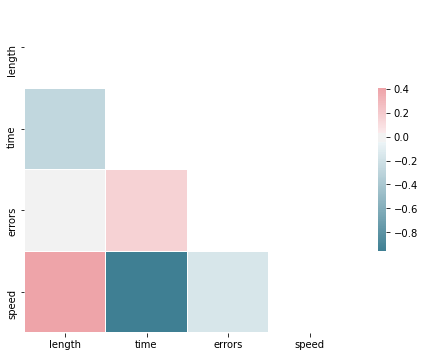

In [12]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(10, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [13]:
display(corr)

length      time    errors     speed
length  1.000000 -0.274201  0.025413  0.405643
time   -0.274201  1.000000  0.169637 -0.958664
errors  0.025413  0.169637  1.000000 -0.161776
speed   0.405643 -0.958664 -0.161776  1.000000

### Possible explanations
  
We can see from the correlation matrix that speed and errors are negatively correlated(correlation = -0.16)
  
    
Although it isnt much, some negative correlation can be attributed to this:  
1. When you make errors, you have to retype the character untill it is right
2. When you type without errors, you have better flow and thus we observe more outliers deviating upwards than we do downwards



***

# Time Series Forecasting by fitting models 
Performing linear regression and Support Vector Regression on speed series

0.7126472617704931
0.7632525975469917


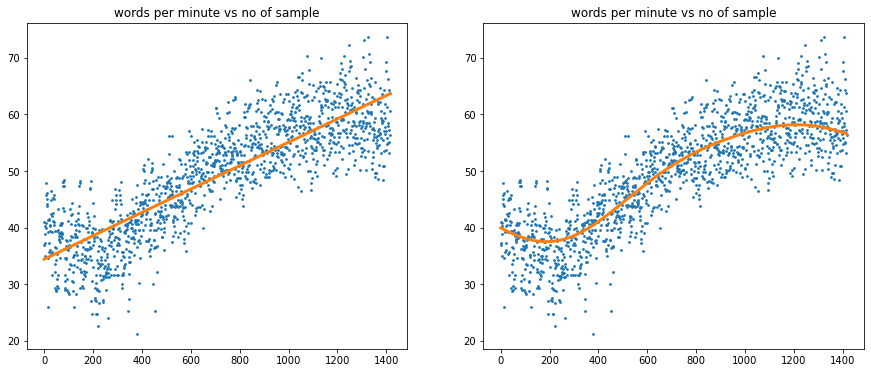

In [17]:
reg = LinearRegression()
reg.fit(np.array(df['speed'].index).reshape(-1,1),df['speed'].values)
print(reg.score(np.array(df['speed'].index).reshape(-1,1),df['speed'].values))
reg_predict = reg.predict(np.array(df['speed'].index).reshape(-1,1))

reg_svr = SVR()
reg_svr.fit(np.array(df['speed'].index).reshape(-1,1),df['speed'].values)
print(reg_svr.score(np.array(df['speed'].index).reshape(-1,1),df['speed'].values))
reg_svr_predict = reg_svr.predict(np.array(df['speed'].index).reshape(-1,1))

plt.figure(figsize = (15,6))

plt.subplot(121)
plt.plot(df[['speed']]/5, 'o', markersize = '1.75')
plt.plot(reg_predict/5, linewidth = '3')
plt.title("words per minute vs no of sample")

plt.subplot(122)
plt.plot(df[['speed']]/5, 'o', markersize = '1.75')
plt.plot(reg_svr_predict/5, linewidth = '3')
plt.title("words per minute vs no of sample")

plt.show()

Linear regression on errors time series

0.004404794725845873


Text(0.5, 1.0, 'words per minute vs no of sample')

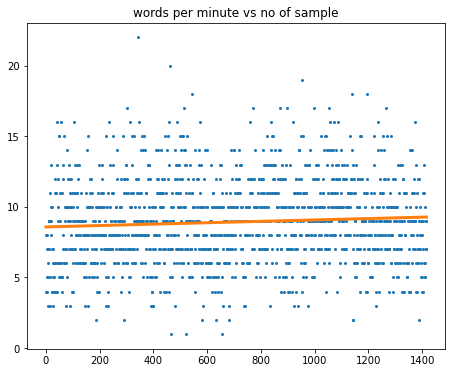

In [20]:
# from sklearn.linear_model import LinearRegression
reg_err = LinearRegression()
reg_err.fit(np.array(df['errors'].index).reshape(-1,1),df['errors'].values)
print(reg_err.score(np.array(df['errors'].index).reshape(-1,1),df['errors'].values))
reg_err_predict = reg_err.predict(np.array(df['errors'].index).reshape(-1,1))

ax = plt.figure(figsize = (7.5,6))
plt.plot(df['errors'], 'o', markersize = '2')
plt.plot(reg_err_predict, linewidth = '3')
plt.title("words per minute vs no of sample")
# plt.xticklabels(ax.get_xticklabels()/5)

Even thought my speed increased(mostly), the errors seem to stay constant!

******

# Visualizing character level trends

add speed column in dfi dataframe  
replace inf values with nan, and then drop them

In [21]:
dfi['speed'] = dfi['hitCount']/dfi['timeToType']*1000
dfi['speed'] = dfi['speed'].replace([np.inf, -np.inf], np.nan)
dfi.dropna( inplace = True)
display(dfi.head())
print(dfi.shape)

charCode  hitCount  missCount  timeToType  sample no       speed
0        32        20          0         161          0  124.223602
1       101        27          2         241          0  112.033195
2       105        17          1         309          0   55.016181
3       108         3          0         408          0    7.352941
4       110        11          2         384          0   28.645833

(27029, 6)


characters: total no of unique characters on the keyboard

In [22]:
characters = dfi['charCode'].unique()

groups_char: list containing dataframes of char level data for each unique character.  
Each dataframe is indexed by the sample nos of the rows

In [23]:
groups_char = []

for ch in characters:
    x = dfi[dfi['charCode'] == ch].groupby('sample no')[['charCode','speed','missCount','hitCount']].agg({'charCode':['mean'],'speed':['mean'],'missCount':['sum'],'hitCount':['sum']})
    x.columns = ['charCode','speed','missCount','hitCount']
    x.reset_index()
    groups_char.append(x)


display(groups_char[0].head())
print(groups_char[0].shape)

charCode       speed  missCount  hitCount
sample no                                           
0                32  124.223602          0        20
1                32  116.022099          0        21
2                32  111.702128          0        21
3                32  158.620690          0        23
4                32  116.959064          1        20

(1417, 4)


 Remove "space" char from the our analysis

In [24]:
groups_char = groups_char[1:]

In [25]:
# del reg1

### Comparing trends for each characer

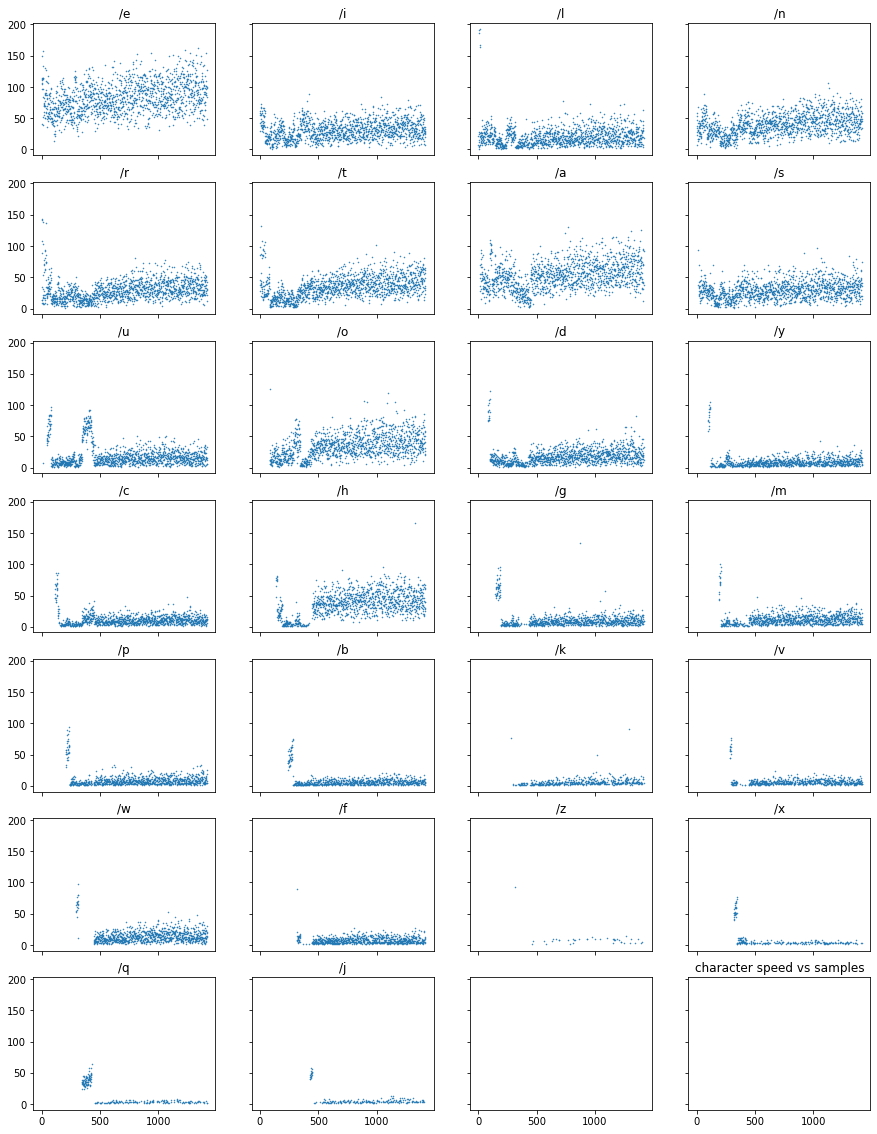

In [26]:
%matplotlib inline

fig, axs = plt.subplots(nrows=int(float(len(groups_char))/4.0 + 0.5), ncols=4, sharex=True, sharey=True)
axs = axs.flatten()

plt.title('character speed vs samples')

fig.set_figheight(20)
fig.set_figwidth(15)

for i in range(len(groups_char)):
    x = groups_char[i]
    ts = x['speed'] 
    ch = chr(x['charCode'].iloc[0])
    
#     reg1 = LinearRegression()
#     reg1.fit(np.reshape(np.array(range(ts.shape[0])), newshape = (-1,1)),ts.values)#.reshape(-1,1)
#     #     print(reg1.score(np.array(ts.index).reshape(-1,1),ts.values))
#     reg1_predict = reg1.predict(np.array(ts.index).reshape(-1,1))
    
#     del reg1
    
    
    axs[i].set_title('/'+ str(ch))
    axs[i].plot(ts,'o', markersize = 0.5)
    

### Visualizing trends in character level data, all at once

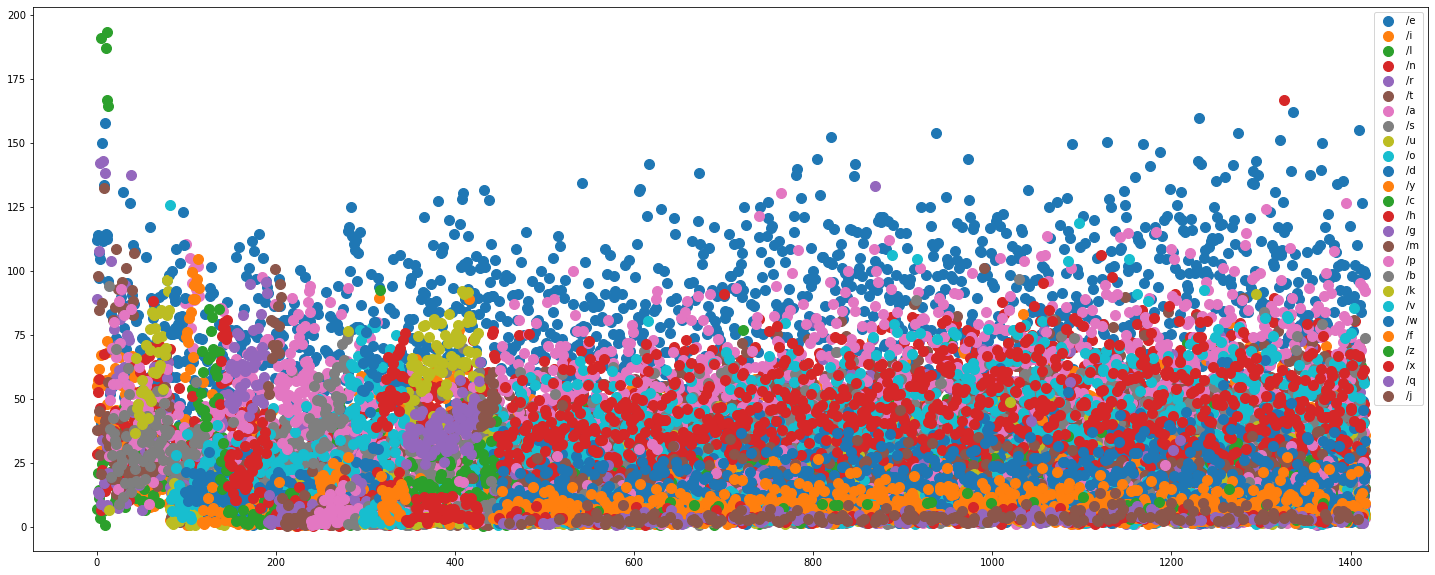

In [27]:

plt.figure(figsize = (25,10))
# fig, axs = plt.subplots(nrows=len(groups_char), ncols=1, sharex=True, sharey=True)
for i in range(len(groups_char)):
    x = groups_char[i]
#     ax = plt.subplot(sharex = ax)
    ts = x['speed'] 
    ch = chr(x['charCode'].iloc[0])
#     setp(ax.get_xticklabels(), visible=False)
    
    plt.plot(ts,'o', markersize = 10)
#     plt.set_title(str(ch)+': speed vs samples')
plt.legend(['/' + chr(i['charCode'].iloc[0]) for i in groups_char])
#     plt.title()

Okay, this is really messy and hard to infer anything from. For a better comparison we can use Altair to cluster the data by characters

## Plotting character trends, clustered by each key

Retreiving each DataFrame from the list and appending it to one large DataFrame.  
Each row is marked with the character value it is an instance of.

In [28]:
df_groups = pd.DataFrame()
for g in groups_char:
    g['sample'] = g.index
    df_groups = df_groups.append(g)
    
df_groups['charval'] = df_groups['charCode'].apply(lambda x: chr(x))
display(df_groups.head())
print(df_groups.shape)

charCode       speed  missCount  hitCount  sample charval
sample no                                                           
0               101  112.033195          2        27       0       e
1               101  113.924051          1        27       1       e
2               101   97.378277          2        26       2       e
3               101  106.995885          1        26       3       e
4               101  104.729730          2        31       4       e

(25612, 6)


### Using Altair to plot the data

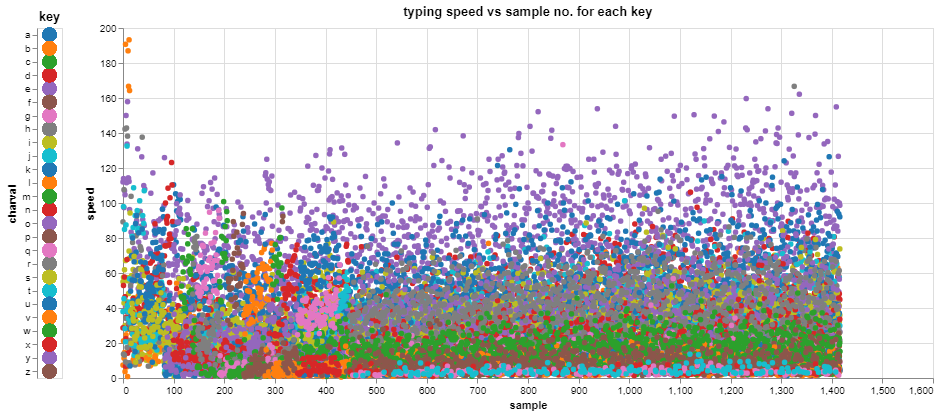

In [29]:
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['charval'])


opacity = alt.condition(selection, alt.value(1.0), alt.value(0.07))

color = alt.condition(selection,
                      alt.Color('charval:N', legend=None, 
                      scale=alt.Scale(scheme='category10', zero = False)),
                      alt.value('lightgray'))

legend = alt.Chart(df_groups).mark_point(filled=True ,size = 200).encode(
    y=alt.Y('charval:N', axis=alt.Axis(orient='left')),
    color=color
).add_selection(
selection
).properties(title="key",height=350, width = 25
)

cluster_chart = alt.Chart(df_groups).mark_point(filled=True).encode(
    alt.X('sample', scale=alt.Scale(zero=False)),
    alt.Y('speed', scale=alt.Scale(zero=False)),
#     alt.Color('charval:N'),
#     alt.Color = color,
#     alt.OpacityValue(0.5),
    
    tooltip = [alt.Tooltip('charval:N'),
               alt.Tooltip('speed:Q'),
               alt.Tooltip('sample:O')
              ],
    opacity = opacity,
    
#     alt.Legend(legend),# = legend,
#     legend = legend,
    color=color
    
    
    
).add_selection(
selection
).properties(title="typing speed vs sample no. for each key",height=350, width = 810
)#.interactive()

# cluster_chart | legend
# legend(cluster_chart)
# cluster_chart.legend
legend | cluster_chart #| legend 

***

# Plotting the statistics of character level data

In [30]:
df_char_avgspeed = df_groups.groupby('charval', as_index = False).agg({'speed':['mean',np.std],'charval':[],'missCount':['sum'],'hitCount':['sum']})
df_char_avgspeed.columns = ['charval','mean speed','std speed','miss','hit']
df_char_avgspeed.reset_index()

df_char_avgspeed['miss/hit'] = df_char_avgspeed['miss']/df_char_avgspeed['hit']

display(df_char_avgspeed.head())
print(df_char_avgspeed.shape)

charval  mean speed  std speed  miss    hit  miss/hit
0       a   53.003410  21.757524   566  11615  0.048730
1       b    8.284057  10.576106   225   2215  0.101580
2       c   11.710751   9.613213   403   4089  0.098557
3       d   18.692930  13.332336   502   5826  0.086165
4       e   82.662489  24.739481  1146  20088  0.057049

(26, 6)


### Speed and errors averaged over time for each key

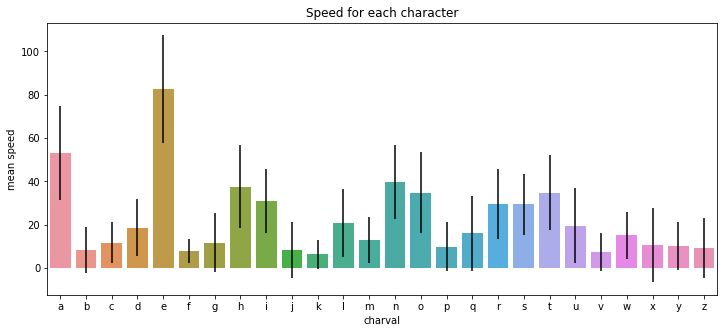

In [31]:
import seaborn as sns

plt.figure(figsize = (12,5))
plt.title('Speed for each character')
sns.barplot(x = 'charval', y = 'mean speed',data = df_char_avgspeed,yerr = df_char_avgspeed['std speed'])

### Character wise miss, hit, and miss per hit rate
This quantifies how proficient/confident I am with a particular key, not in terms of speed but in terms of accuracy

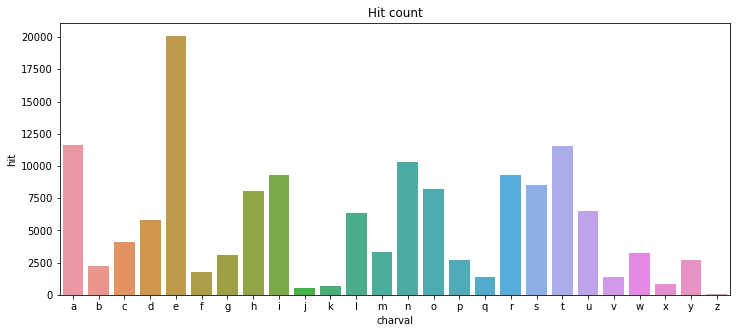

In [32]:
plt.figure(figsize = (12,5))
plt.title('Hit count')
sns.barplot(x = 'charval', y = 'hit',data = df_char_avgspeed)

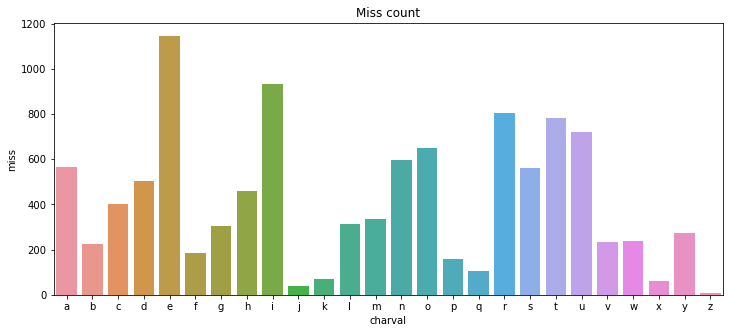

In [33]:
plt.figure(figsize = (12,5))
plt.title('Miss count')
sns.barplot(x = 'charval', y = 'miss',data = df_char_avgspeed)

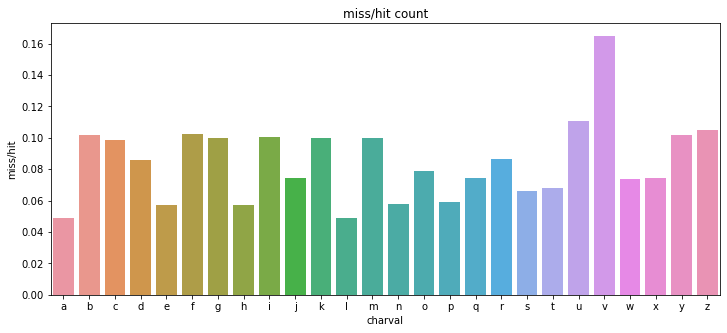

In [34]:
plt.figure(figsize = (12,5))
plt.title('miss/hit count')
sns.barplot(x = 'charval', y = 'miss/hit',data = df_char_avgspeed)

***

# Analysing Temporal Patterns in the data 

In [35]:
df['datetime'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d:%H:%M:%S+00:00')
df = df.drop(columns = ['timeStamp'])
display(df.head())
print(df.shape)

length   time  errors  speed  \
0     121  39288       8    185   
1     123  35937       4    205   
2     124  39959       7    186   
3     126  37615       4    201   
4     121  37476       8    194   

                                           histogram                  datetime  
0  [{'charCode': 32, 'hitCount': 20, 'missCount':... 2020-07-02 20:08:47+00:00  
1  [{'charCode': 32, 'hitCount': 21, 'missCount':... 2020-07-02 20:09:28+00:00  
2  [{'charCode': 32, 'hitCount': 21, 'missCount':... 2020-07-02 20:10:05+00:00  
3  [{'charCode': 32, 'hitCount': 23, 'missCount':... 2020-07-02 20:10:46+00:00  
4  [{'charCode': 32, 'hitCount': 20, 'missCount':... 2020-07-02 20:11:25+00:00

(1417, 6)


### How does my speed, errors, and time dedicated each day progress over the month?
And how are the variables interrelated?

In [36]:
df_days_mean = df.resample('1D', on = 'datetime').mean()#.apply(lambda x: x)
df_days_sum = df.resample('1D', on = 'datetime').sum()#.apply(lambda x: x)
display(df_days_mean.head())
print(df_days_mean.shape)

length          time    errors       speed
datetime                                                                 
2020-07-02 00:00:00+00:00  123.391304  37603.000000  7.260870  200.000000
2020-07-03 00:00:00+00:00  122.137931  38723.517241  7.793103  192.862069
2020-07-04 00:00:00+00:00  123.769231  40635.723077  8.815385  186.446154
2020-07-05 00:00:00+00:00  120.142857  40891.928571  9.071429  179.071429
2020-07-06 00:00:00+00:00  120.949367  40300.000000  8.050633  183.721519

(37, 4)


Text(0.5, 1.0, 'speed, errors, and total time spend each day')

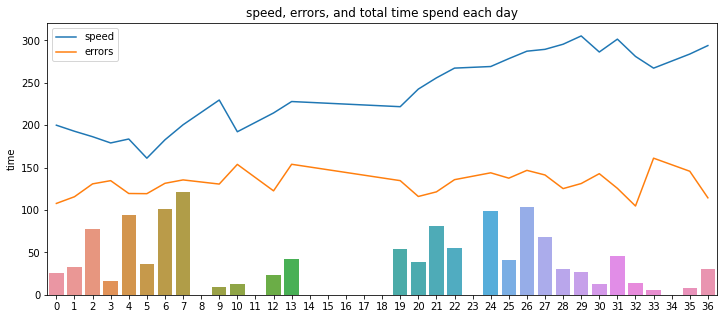

In [37]:
plt.figure(figsize = (12,5))
sns.lineplot(x=list(range(df_days_mean['speed'].shape[0])),y=df_days_mean['speed'])#, style = 'g', markersize = '8', linewidth = '5'
sns.lineplot(x=list(range(df_days_mean['errors'].shape[0])),y=df_days_mean['errors']*df_days_mean['speed'].min()/df_days_mean['errors'].max()) #, style = 'r--', markersize = '8',linewidth = '5'
sns.barplot(x = list(range(df_days_sum['time'].shape[0])),y = df_days_sum['time']*df_days_mean['speed'].mean()/df_days_sum['time'].max()/2)

plt.legend(['speed','errors'])
plt.title('speed, errors, and total time spend each day')

### Which hour of the day do I type faster?

In [38]:
import datetime as dt

df_hour = df.resample('1H', on = 'datetime').mean()
gb_hour = df_hour.groupby([df_hour.index.hour]).agg('mean')
# gb_hour.reset_index()
# df_hour['hour'] = 
display(gb_hour.head())
print(gb_hour.shape)

length          time    errors       speed
datetime                                                
0         123.022857  31703.866580  9.104113  242.422814
1         123.139665  27837.305991  9.741666  268.635615
2         123.460879  27995.522125  8.501355  266.243883
3         124.757143  35893.042857  8.871429  212.914286
4         125.000000  35889.553571  7.821429  215.000000

(24, 4)


Text(0.5, 1.0, 'Avg speed at each hour of the day')

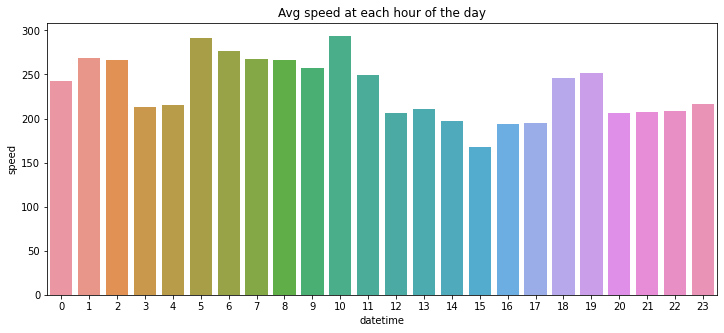

In [39]:

plt.figure(figsize = (12,5))

sns.barplot(gb_hour.index,gb_hour['speed'])
# plt.set_xlabels(gb_hour.index)
plt.title('Avg speed at each hour of the day')

***

## Further Goals-
* ~~use altair to visualize the above graph by clicking on dots and seeing graph for a particular colour~~  
* temporal patters
 * ~~use data and time as separate columns and compare average typing speeds as a funcion of  the # of the sample for a day ~~ 
 * ~~groupby time bins and compare avg typing speeds around the clock  ~~
 * ~~ask questions about the corellation of speed with errors and std deviation of speeds vs std deviation of speed/errors  ~~
